# Part I - Ford GoBike Data Exploration
## by Fouad Mesbah

## Introduction

The dataset used in this project is the Ford GoBike System Data.  
It contains information about more than 183,000 individual bike trips made in the San Francisco Bay Area’s bike-sharing program.  Each record includes trip details such as duration, start and end times, stations, and rider information.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Quick check
df.shape
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Quick check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

The dataset contains 183,412 rows and 16 columns.  
Each row represents a single bike trip.  
The variables are:  

- **duration_sec**: Trip duration in seconds  
- **start_time**: Start time of the trip  
- **end_time**: End time of the trip  
- **start_station_id**: ID of the start station  
- **start_station_name**: Name of the start station  
- **start_station_latitude**: Latitude of the start station  
- **start_station_longitude**: Longitude of the start station  
- **end_station_id**: ID of the end station  
- **end_station_name**: Name of the end station  
- **end_station_latitude**: Latitude of the end station  
- **end_station_longitude**: Longitude of the end station  
- **bike_id**: ID of the bike used  
- **user_type**: Type of user (Subscriber or Customer)  
- **member_birth_year**: Birth year of the rider  
- **member_gender**: Gender of the rider  
- **bike_share_for_all_trip**: Indicates whether the ride was part of the Bike Share for All program

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are those that describe trip behavior:  

- **duration_sec** (trip length)  
- **start_time** (when trips begin)  
- **end_time** (when trips finish)  
- **user_type** (Subscriber vs Customer)  

These features are the most relevant for identifying patterns in how different users engage with the bike-sharing system.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To support the analysis of the main features, the following features will be useful:

- **Weekday and hour (can be derived from `start_time`)** → These features can reveal commuting patterns by showing when trips typically occur.  
- **Member demographics (`member_birth_year`, `member_gender`)** → These features may provide additional perspective on how different groups of users behave.  
- **Weekday grouping** → This will allow direct comparison between weekdays and weekends, clarifying commuting vs. leisure use.  
- **Station information (start/end station names and locations)** → These features could support the exploration of spatial patterns.  

These supporting features will enrich the investigation by helping explain when and under what conditions different trip behaviors occur, while the main focus remains on duration, time, and user type.


## Univariate Exploration

**Question:**  
What is the distribution of trip durations? Are most trips short or long?

In [5]:
# Convert duration to minutes for easier interpretation
df['duration_min'] = df['duration_sec'] / 60

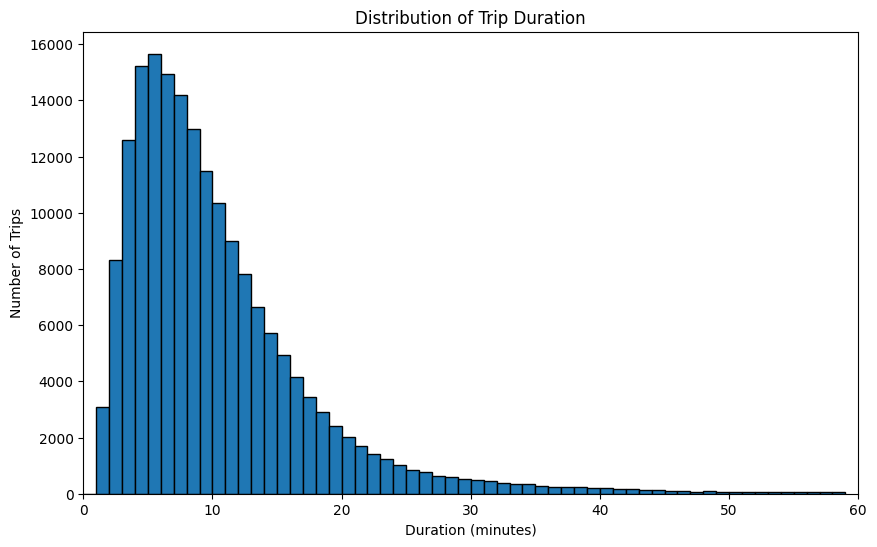

In [6]:
# Histogram plot
plt.figure(figsize=(10,6))
bins = np.arange(0, 60, 1)  # focus on trips < 60 minutes
plt.hist(df['duration_min'], bins=bins, edgecolor='black')
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Trips')
plt.xlim(0,60)
plt.show()

**Observation:**  
The distribution of trip durations is highly right-skewed.  
Most trips last between 5 and 20 minutes, with a clear peak around 8–10 minutes.  
Very few trips exceed 30 minutes, confirming that the bike-sharing system is mainly used for short rides, likely commuting or quick errands.

**Question:**  
Which group uses the bike-sharing system more frequently: Subscribers or Customers?

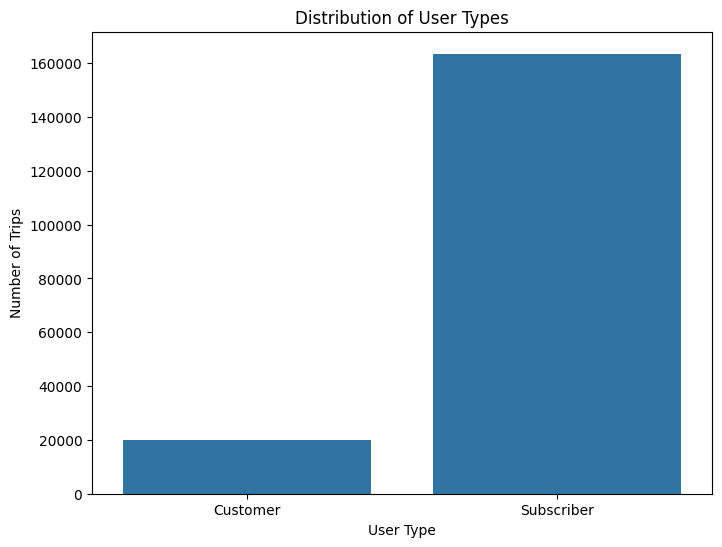

In [7]:
# Plot the distribution of user types to compare the number of trips
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='user_type', color='tab:blue')

plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.show()

**Observation:**  
The distribution of user types shows that the system is overwhelmingly used by Subscribers, who account for the vast majority of trips. Customers represent only a small fraction of rides.  
This indicates that the bike-sharing program is primarily used by regular, subscribed riders rather than occasional users.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of trip durations is highly right-skewed, most rides last between 5 and 20 minutes, with a clear peak around 8–10 minutes. Very few trips extend beyond 30 minutes. To make the values more interpretable, I created a new variable (`duration_min`) by converting trip duration from seconds to minutes. No other transformations were required at this stage.

The distribution of user types shows a strong imbalance, as subscribers account for the overwhelming majority of trips, while Customers represent only a small fraction. This indicates that the service is mainly used by regular riders rather than occasional ones.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of trip durations shows a long right tail, with a small proportion of rides extending well beyond one hour. To make the distribution easier to visualize and interpret, I focused the histogram on trips under 60 minutes. Longer trips are less common but not necessarily outliers, as they may represent recreational rides or extended use of the service.  

## Bivariate Exploration

**Question:**  
Does trip duration vary depending on the time of day when the ride starts?

In [8]:
# Extract the start hour
df['start_hour'] = pd.to_datetime(df['start_time']).dt.hour

In [9]:
# Create a random sample of 5,000 rides
sample = df.sample(5000, random_state=1).copy()
sample['start_hour_jitter'] = sample['start_hour'] + np.random.uniform(-0.3, 0.3, size=len(sample))

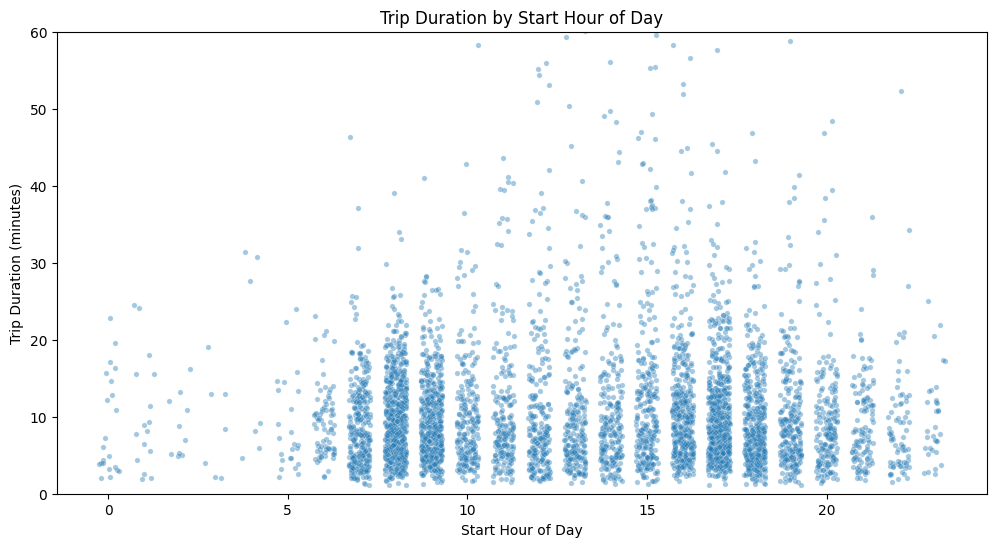

In [10]:
# Scatter plot showing the relationship between trip duration and start hour of the day
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=sample,
    x='start_hour_jitter',
    y='duration_min',
    alpha=0.4,
    color='tab:blue',
    s=15
)
plt.title("Trip Duration by Start Hour of Day")
plt.xlabel("Start Hour of Day")
plt.ylabel("Trip Duration (minutes)")
plt.ylim(0,60)
plt.show()

**Observation:**  
Trips occur throughout the day, but there are clear peaks in density around 8-9 a.m. and 4-5-6 p.m. The morning peak likely reflects commuting to work or school, while the afternoon peak corresponds to people returning home, as well as some using the service for leisure or social activities after work and school.  
In both cases, most rides remain short, typically under 30 minutes, highlighting the system’s role in daily mobility rather than long-distance travel.

**Question:**  
Do Subscribers and Customers differ in their trip durations?

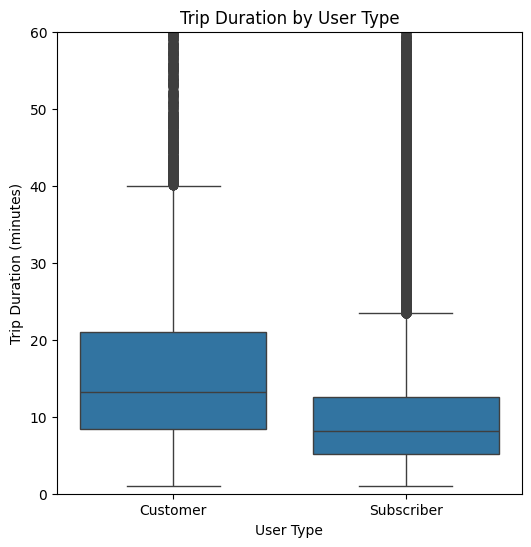

In [11]:
# Box plot comparing trip durations between Subscribers and Customers
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='user_type', y='duration_min')

plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.ylim(0,60)
plt.show()

**Observation:**  
The boxplot clearly shows that Customers take longer trips on average than Subscribers.  
Subscribers have shorter and more consistent ride durations, typically under 15 minutes, which aligns with commuting or daily use. Customers, in contrast, show a higher median duration and a wider spread, indicating that casual users often take the bikes for leisure or recreational purposes.
 
Although these longer rides appear as statistical outliers in the boxplot, they likely represent valid but less frequent use cases such as leisure, tourism, or longer-distance commuting.

**Question:**  
How does ride frequency vary by weekday and hour of the day?

In [12]:
# Extract the weekdays
df['weekday'] = pd.to_datetime(df['start_time']).dt.day_name()

In [13]:
# Order weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [14]:
# Count of trips by weekday and hour
heatmap_data = df.pivot_table(
    index='weekday',
    columns='start_hour',
    values='duration_sec',
    aggfunc='count'
).reindex(weekday_order)

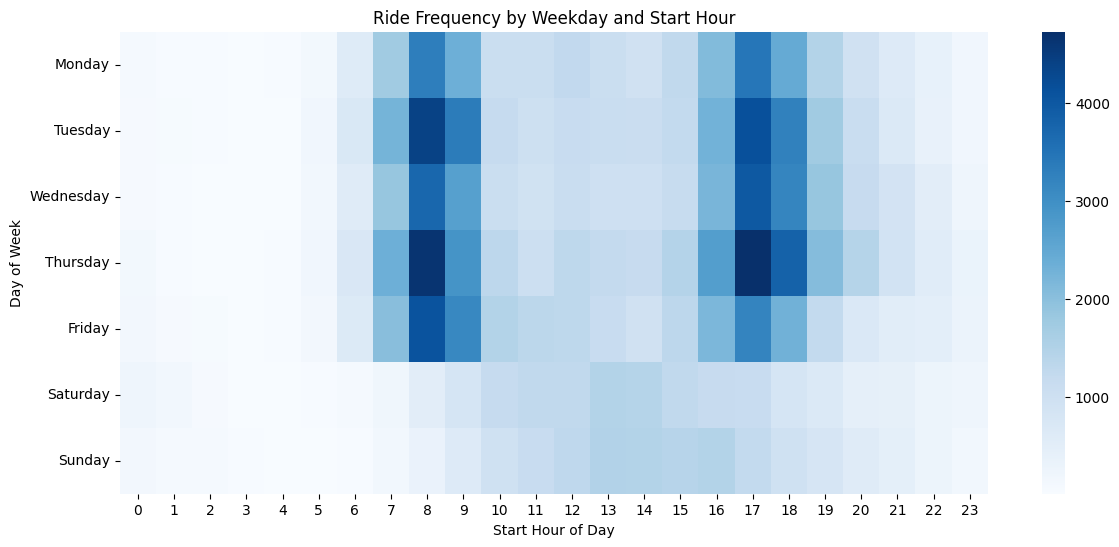

In [15]:
# Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap='Blues')

plt.title('Ride Frequency by Weekday and Start Hour')
plt.xlabel('Start Hour of Day')
plt.ylabel('Day of Week')
plt.show()

**Observation:**  
The heatmap clearly shows a strong contrast between weekdays and weekends.  
- **Weekdays (Monday–Friday):** Sharp peaks appear around 8 AM and 5–6 PM, which align with commuting hours. This indicates that the system is heavily used for work or school commutes.  
- **Weekends (Saturday–Sunday):** Usage is much lower and more evenly spread throughout the day, consistent with casual or leisure trips.  

Ford GoBike usage is primarily driven by weekday commuters, with distinct rush hour peaks, while weekends reflect lighter, more relaxed use.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
  
- From the scatterplot of trip duration vs. start hour, I observed that trips are spread across all hours, but there are two clear peaks in usage: one around 8–9 AM and another around 5–6 PM. This pattern suggests that many riders use the system for commuting to and from work or school.  
- From the boxplot of user type vs. trip duration, it is clear that Customers generally take longer trips compared to Subscribers, whose rides are shorter and more consistent. This aligns with the idea that subscribers mainly use the service for daily commuting, while customers use it more for casual or leisure rides.  
- From the heatmap of ride frequency by weekday and hour, strong peaks appear during weekday rush hours (morning and evening), while weekends show much lower and flatter usage. This reinforces the conclusion that the system is mainly driven by weekday commuters.  

## Multivariate Exploration

**Question:**  
How does ride frequency vary by weekday and hour of the day?

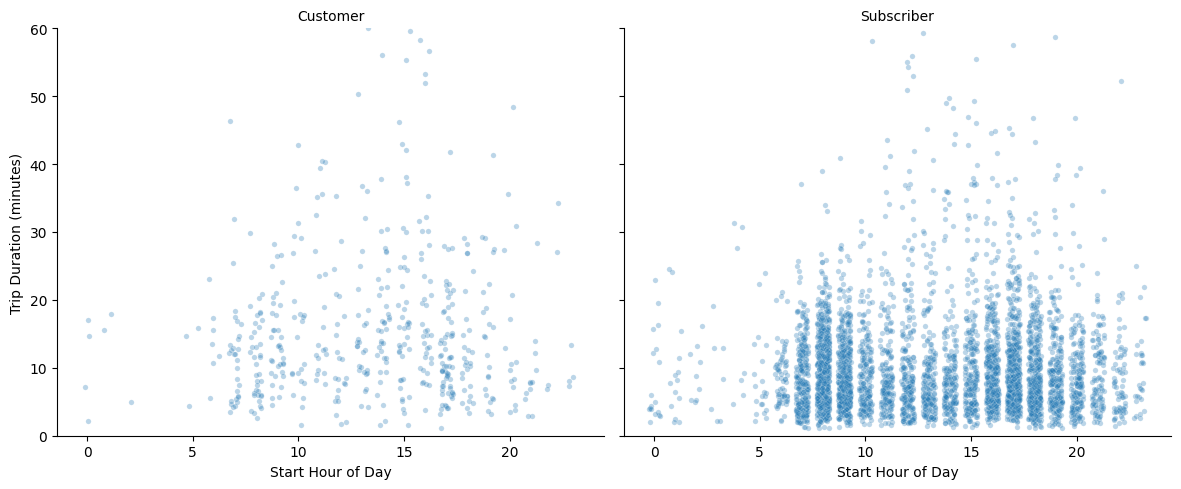

In [16]:
# Faceted scatter plots of trip duration vs. start hour, split by user type
g = sns.FacetGrid(sample, col="user_type", height=5, aspect=1.2)
g.map(sns.scatterplot, "start_hour_jitter", "duration_min", 
      alpha=0.3, color="tab:blue", s=15)
g.set_axis_labels("Start Hour of Day", "Trip Duration (minutes)")
g.set_titles("{col_name}")
plt.ylim(0,60)
plt.show()

**Observation:**  
When splitting the data by user type, some differences appear:  
- **Subscribers:** Trips are much more frequent overall, especially during commuting hours (around 8 AM and 5–6 PM). Most rides are short, but there is still a noticeable share of longer rides.  
- **Customers:** Trips are fewer, but more evenly distributed throughout the day. Their ride durations cover a similar range as Subscribers, though the distribution suggests more casual or leisure-oriented usage.  

Subscribers dominate the system and concentrate usage during rush hours, while Customers show a more flexible pattern not tied to commuting schedules.

**Question:**  
How does ride frequency vary by weekday and hour of the day?

In [17]:
# Average trip duration by weekday and user type (for rides <= 120 min)
avg_dur = (df[df['duration_min'] <= 120]
           .groupby(['weekday','user_type'])['duration_min']
           .mean()
           .reset_index())
avg_dur['weekday'] = pd.Categorical(avg_dur['weekday'], categories=weekday_order, ordered=True)
avg_dur = avg_dur.sort_values('weekday')

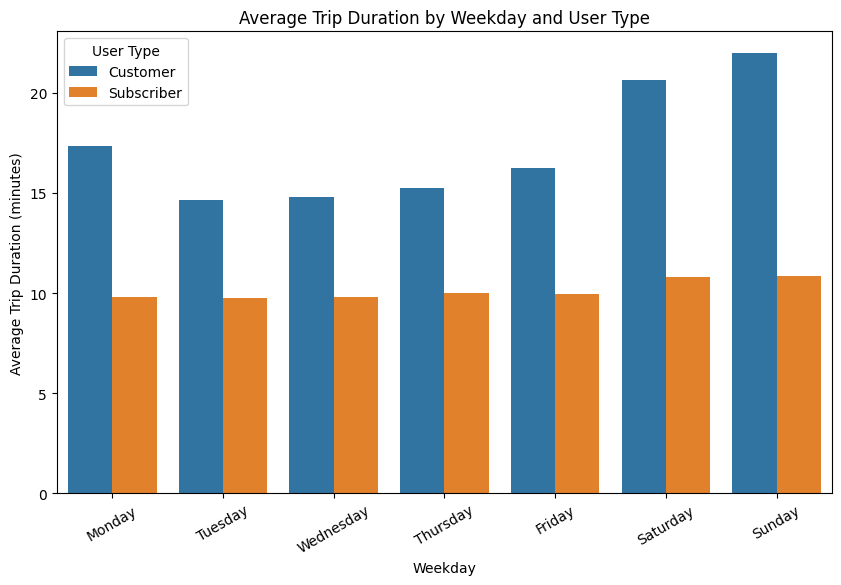

In [18]:
# Bar plot of average trip duration by weekday and user type
plt.figure(figsize=(10,6))
sns.barplot(data=avg_dur, x='weekday', y='duration_min', hue='user_type')
plt.title('Average Trip Duration by Weekday and User Type')
plt.xlabel('Weekday')
plt.ylabel('Average Trip Duration (minutes)')
plt.legend(title='User Type')
plt.xticks(rotation=30)
plt.show()

### Observation
The clustered bar chart reveals a clear difference in riding patterns between Subscribers and Customers.  
- Subscribers have consistently shorter average trip durations (around 10 minutes) across all weekdays, reflecting their regular, utilitarian use for commuting.  
- In contrast, Customers take noticeably longer trips on average, especially on weekends (up to 20+ minutes), which suggests more leisure-oriented usage.  

This highlights that trip purpose differs strongly by user type: Subscribers ride frequently but briefly, while Customers ride less often but for longer periods.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate analysis highlighted complementary insights:  
- The Facet Plot (Trip Duration vs Start Hour, split by user type) showed that both Subscribers and Customers tend to ride more during commuting hours. However, the spread of trip durations was more pronounced for Customers, suggesting leisure or non-routine usage.  
- The Clustered Bar Chart (Average Trip Duration by Weekday and User Type) reinforced this pattern, revealing that Subscribers consistently have shorter average trip durations across all weekdays, while Customers’ trips are longer, particularly on weekends.  

Together, these visualizations strengthened the idea that Subscribers primarily use the service for commuting, while Customers use it more for leisure.

### Were there any interesting or surprising interactions between features?

One interesting interaction was how day of the week and user type interact:  
- For Subscribers, weekdays dominate with short, frequent trips, but weekends show much less activity.  
- Customers, on the other hand, display longer trips on weekends, which contrasts with their lower presence during the week.  

This suggests that the same system serves two distinct usage patterns depending on user type: one utilitarian and frequent (Subscribers) and one leisure-oriented and occasional (Customers).

## Conclusions
Here is a summary of the key findings from the exploratory data analysis:

- **Trip durations** are right-skewed: most rides are short (under 20 minutes), with fewer longer rides.  
- **User types** differ strongly: Subscribers dominate in numbers but take shorter trips, while Customers take longer trips on average.  
- **Time of day** matters: ridership peaks around 8–9 AM and 5–6 PM, consistent with commuting patterns.  
- **Day of week** effect: weekdays show much higher usage than weekends, reinforcing the commuting purpose for Subscribers.  
- **User behavior differences**: Customers ride more for leisure (especially weekends, longer trips), while Subscribers ride more for commuting (shorter, regular trips).  
- **Multivariate insights**: combining user type, weekday, and trip duration confirmed two distinct groups of usage—commuters vs leisure riders.

Overall, the analysis shows that the Ford GoBike system primarily supports daily commuting for Subscribers, while still attracting leisure-oriented Customers who use it differently (longer, less frequent rides, especially on weekends).